# 1. Library Import

In [1]:
import numpy as np
import pandas as pd
import gc
import math
import os.path
import time
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from dateutil import parser
from tqdm import tqdm
import copy
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. 데이터 불러오기
## 1) read. csv

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_path = '/content/drive/MyDrive/Colab/bit'
train_x_df = pd.read_csv(data_path  + "/train_x_df.csv")
train_y_df = pd.read_csv(data_path  + "/train_y_df.csv")
test_x_df = pd.read_csv(data_path  + "/test_x_df.csv")

In [5]:
train_x_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.010004,1.010004,1.009612,1.010004,8.382875e+05,43160.632812,451.157288,7.326834e+05,37725.183594
1,0,1,7,1.009808,1.009808,1.009808,1.009808,1.622420e+05,8352.220703,39.231071,0.000000e+00,0.000000
2,0,2,7,1.009808,1.010200,1.009808,1.010200,1.664967e+04,857.377808,58.846603,1.664967e+04,857.377808
3,0,3,7,1.010200,1.011181,1.010200,1.011181,2.586971e+06,133310.343750,431.541779,2.189147e+06,112811.046875
4,0,4,7,1.010985,1.010985,1.010200,1.010200,1.129996e+06,58216.867188,176.539810,0.000000e+00,0.000000


In [6]:
train_x_df.tail()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
10159555,7361,1375,8,1.000668,1.001669,1.000626,1.001502,9.180907,2203.059082,2.245034,6.229020,1494.727417
10159556,7361,1376,8,1.001627,1.001920,1.000960,1.001294,7.963097,1911.151611,2.211651,3.056139,733.490601
10159557,7361,1377,8,1.001294,1.001461,1.000584,1.000668,3.849893,923.610718,1.260224,2.284546,548.042297
10159558,7361,1378,8,1.000709,1.000751,1.000042,1.000042,1.337402,320.624756,0.826239,0.516497,123.819839
10159559,7361,1379,8,1.000000,1.000918,0.999958,1.000876,1.278548,306.542389,0.642631,0.732091,175.527679


In [7]:
df_sorted_by_values = train_x_df.sort_values(by=['open', 'volume'] ,ascending=False)

In [9]:
df_sorted_by_values.tail()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
9551068,6921,88,4,0.554385,0.556126,0.554370,0.556096,76807.617188,28161.669922,60.562012,52430.804688,19231.615234
9551044,6921,64,4,0.554112,0.555248,0.553249,0.555248,238474.281250,87270.765625,89.328972,193699.125000,70894.468750
4206240,3048,0,4,0.554023,0.554023,0.554023,0.554023,121.342064,60.671032,1.108045,0.000000,0.000000
9278940,6723,1200,8,0.472247,0.992239,0.472247,0.992239,0.053928,9.449642,0.045846,0.053252,9.254864
2602680,1886,0,2,0.089037,4.451831,0.089037,0.898380,162143.875000,607354.437500,457.648254,93713.796875,377192.156250


In [8]:
df_sorted_by_values.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
516136,374,16,5,2.066901,2.066901,2.066901,2.066901,2.084859e+05,1223.812256,352.112671,2.084859e+05,1223.812256
516134,374,14,5,2.066901,2.066901,2.066901,2.066901,1.929930e+05,1132.868652,352.112671,1.929930e+05,1132.868652
516135,374,15,5,2.066901,2.066901,2.066901,2.066901,1.703521e+05,999.966919,352.112671,1.703521e+05,999.966919
516137,374,17,5,2.066901,2.066901,2.066901,2.066901,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516138,374,18,5,2.063380,2.063380,2.063380,2.063380,7.848944e+06,45994.808594,1056.338013,7.848944e+06,45994.808594


In [10]:
df_sorted_by_values.mean()

sample_id        3680.500000
time              689.500000
coin_index          5.495925
open                1.000988
high                1.001753
low                 1.000196
close               1.000980
volume         765786.166488
quote_av        42689.067190
trades            117.967593
tb_base_av     364791.121967
tb_quote_av     21061.373236
dtype: float64

In [11]:
df_sorted_by_values.median()

sample_id      3680.500000
time            689.500000
coin_index        6.000000
open              1.000000
high              1.000556
low               0.999450
close             1.000000
volume            3.231240
quote_av        322.020782
trades            0.779619
tb_base_av        1.039115
tb_quote_av     115.270428
dtype: float64

In [11]:
df_sorted_by_values2 = train_x_df.sort_values(by=['open'] ,ascending=False)
df_sorted_by_values2.head(10)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
516136,374,16,5,2.066901,2.066901,2.066901,2.066901,2.084859e+05,1223.812256,352.112671,2.084859e+05,1223.812256
516137,374,17,5,2.066901,2.066901,2.066901,2.066901,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516134,374,14,5,2.066901,2.066901,2.066901,2.066901,1.929930e+05,1132.868652,352.112671,1.929930e+05,1132.868652
516135,374,15,5,2.066901,2.066901,2.066901,2.066901,1.703521e+05,999.966919,352.112671,1.703521e+05,999.966919
516138,374,18,5,2.063380,2.063380,2.063380,2.063380,7.848944e+06,45994.808594,1056.338013,7.848944e+06,45994.808594
516146,374,26,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516145,374,25,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516144,374,24,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516143,374,23,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516142,374,22,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000


In [12]:
df_sorted_by_values2 = train_x_df.sort_values(by=['open', 'volume'] ,ascending=False)
df_sorted_by_values2.head(10)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
516136,374,16,5,2.066901,2.066901,2.066901,2.066901,2.084859e+05,1223.812256,352.112671,2.084859e+05,1223.812256
516134,374,14,5,2.066901,2.066901,2.066901,2.066901,1.929930e+05,1132.868652,352.112671,1.929930e+05,1132.868652
516135,374,15,5,2.066901,2.066901,2.066901,2.066901,1.703521e+05,999.966919,352.112671,1.703521e+05,999.966919
516137,374,17,5,2.066901,2.066901,2.066901,2.066901,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516138,374,18,5,2.063380,2.063380,2.063380,2.063380,7.848944e+06,45994.808594,1056.338013,7.848944e+06,45994.808594
516139,374,19,5,2.059859,2.059859,2.059859,2.059859,1.857746e+05,1086.781738,352.112671,1.857746e+05,1086.781738
516140,374,20,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516141,374,21,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516142,374,22,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516143,374,23,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000


In [13]:
df_sorted_by_values2 = train_x_df.sort_values(by=['high'] ,ascending=False)
df_sorted_by_values2.head(10)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
2602680,1886,0,2,0.089037,4.451831,0.089037,0.898380,1.621439e+05,607354.437500,457.648254,9.371380e+04,377192.156250
516137,374,17,5,2.066901,2.066901,2.066901,2.066901,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516136,374,16,5,2.066901,2.066901,2.066901,2.066901,2.084859e+05,1223.812256,352.112671,2.084859e+05,1223.812256
516135,374,15,5,2.066901,2.066901,2.066901,2.066901,1.703521e+05,999.966919,352.112671,1.703521e+05,999.966919
516134,374,14,5,2.066901,2.066901,2.066901,2.066901,1.929930e+05,1132.868652,352.112671,1.929930e+05,1132.868652
516138,374,18,5,2.063380,2.063380,2.063380,2.063380,7.848944e+06,45994.808594,1056.338013,7.848944e+06,45994.808594
516144,374,24,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516142,374,22,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516133,374,13,5,2.056338,2.059859,2.056338,2.059859,1.606838e+08,938969.562500,3169.014160,1.606838e+08,938969.562500
516147,374,27,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000


In [6]:
df_sorted_by_values2 = train_x_df.sort_values(by=['low'] ,ascending=False)
df_sorted_by_values2.head(10)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
516136,374,16,5,2.066901,2.066901,2.066901,2.066901,2.084859e+05,1223.812256,352.112671,2.084859e+05,1223.812256
516134,374,14,5,2.066901,2.066901,2.066901,2.066901,1.929930e+05,1132.868652,352.112671,1.929930e+05,1132.868652
516137,374,17,5,2.066901,2.066901,2.066901,2.066901,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516135,374,15,5,2.066901,2.066901,2.066901,2.066901,1.703521e+05,999.966919,352.112671,1.703521e+05,999.966919
516138,374,18,5,2.063380,2.063380,2.063380,2.063380,7.848944e+06,45994.808594,1056.338013,7.848944e+06,45994.808594
516147,374,27,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516146,374,26,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516145,374,25,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516144,374,24,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516143,374,23,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000


In [7]:
df_sorted_by_values2 = train_x_df.sort_values(by=['close'] ,ascending=False)
df_sorted_by_values2.head(10)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
516134,374,14,5,2.066901,2.066901,2.066901,2.066901,1.929930e+05,1132.868652,352.112671,1.929930e+05,1132.868652
516135,374,15,5,2.066901,2.066901,2.066901,2.066901,1.703521e+05,999.966919,352.112671,1.703521e+05,999.966919
516136,374,16,5,2.066901,2.066901,2.066901,2.066901,2.084859e+05,1223.812256,352.112671,2.084859e+05,1223.812256
516137,374,17,5,2.066901,2.066901,2.066901,2.066901,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516138,374,18,5,2.063380,2.063380,2.063380,2.063380,7.848944e+06,45994.808594,1056.338013,7.848944e+06,45994.808594
516133,374,13,5,2.056338,2.059859,2.056338,2.059859,1.606838e+08,938969.562500,3169.014160,1.606838e+08,938969.562500
516143,374,23,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516139,374,19,5,2.059859,2.059859,2.059859,2.059859,1.857746e+05,1086.781738,352.112671,1.857746e+05,1086.781738
516141,374,21,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
516142,374,22,5,2.059859,2.059859,2.059859,2.059859,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000


In [14]:
df_sorted_by_values2 = train_x_df.sort_values(by=['trades'] ,ascending=False)
df_sorted_by_values2.head(10)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
4461875,3233,335,5,0.987421,1.000000,0.987421,1.000000,7.398036e+09,23382562.0,62578.617188,7.340513e+09,23200226.00
516480,374,360,5,1.816901,1.816901,1.760563,1.813380,8.762694e+08,4440993.0,60563.382812,3.177772e+08,1623083.50
9730383,7051,3,5,1.251670,1.431753,1.192173,1.230035,5.257260e+08,22083754.0,59147.312500,2.535293e+08,10755411.00
5076920,3678,1280,5,1.117714,1.152000,1.117714,1.140571,1.671883e+09,16641986.0,59085.714844,1.112467e+09,11060806.00
528310,382,1150,5,1.020964,1.020964,0.987421,1.000000,1.731006e+09,8263256.5,57232.703125,4.072086e+08,1928802.50
5464216,3959,796,5,0.978633,0.980769,0.918804,0.959402,2.786250e+09,12401717.0,56837.609375,6.964849e+08,3099348.25
4138814,2999,194,5,1.083333,1.083333,0.923913,1.052536,2.025699e+09,11418038.0,56340.578125,4.776868e+08,2673028.25
7219879,5231,1099,5,1.009919,1.010821,0.942290,0.947701,8.742868e+08,9485007.0,55906.222656,1.490653e+08,1610090.50
6580026,4768,186,5,0.939145,0.952303,0.886513,0.943257,6.672499e+08,7466797.5,55674.339844,2.424392e+08,2747384.75
5238510,3796,30,5,1.018349,1.024465,0.951070,0.981651,1.434900e+09,9187637.0,55045.871094,6.812947e+08,4325944.50


In [3]:
df_sorted_by_values2 = train_x_df.sort_values(by=['trades'] ,ascending=False)
df_sorted_by_values2.head(10)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
4461875,3233,335,5,0.987421,1.000000,0.987421,1.000000,7.398036e+09,23382562.0,62578.617188,7.340513e+09,23200226.00
516480,374,360,5,1.816901,1.816901,1.760563,1.813380,8.762694e+08,4440993.0,60563.382812,3.177772e+08,1623083.50
9730383,7051,3,5,1.251670,1.431753,1.192173,1.230035,5.257260e+08,22083754.0,59147.312500,2.535293e+08,10755411.00
5076920,3678,1280,5,1.117714,1.152000,1.117714,1.140571,1.671883e+09,16641986.0,59085.714844,1.112467e+09,11060806.00
528310,382,1150,5,1.020964,1.020964,0.987421,1.000000,1.731006e+09,8263256.5,57232.703125,4.072086e+08,1928802.50
5464216,3959,796,5,0.978633,0.980769,0.918804,0.959402,2.786250e+09,12401717.0,56837.609375,6.964849e+08,3099348.25
4138814,2999,194,5,1.083333,1.083333,0.923913,1.052536,2.025699e+09,11418038.0,56340.578125,4.776868e+08,2673028.25
7219879,5231,1099,5,1.009919,1.010821,0.942290,0.947701,8.742868e+08,9485007.0,55906.222656,1.490653e+08,1610090.50
6580026,4768,186,5,0.939145,0.952303,0.886513,0.943257,6.672499e+08,7466797.5,55674.339844,2.424392e+08,2747384.75
5238510,3796,30,5,1.018349,1.024465,0.951070,0.981651,1.434900e+09,9187637.0,55045.871094,6.812947e+08,4325944.50


In [4]:
df_sorted_by_values2 = train_x_df.sort_values(by=['volume'] ,ascending=False)
df_sorted_by_values2.head(10)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
4461875,3233,335,5,0.987421,1.000000,0.987421,1.000000,7.398036e+09,23382562.0,62578.617188,7.340513e+09,2.320023e+07
9202615,6668,775,5,0.987342,0.987342,0.936709,0.962025,3.518412e+09,7987913.5,46835.445312,9.810207e+08,2.230353e+06
9615902,6968,62,5,1.200000,1.200000,1.145833,1.175000,3.219665e+09,9140739.0,24999.998047,5.708095e+08,1.613363e+06
5464216,3959,796,5,0.978633,0.980769,0.918804,0.959402,2.786250e+09,12401717.0,56837.609375,6.964849e+08,3.099348e+06
8483208,6147,348,5,1.009740,1.009740,0.961039,0.964286,2.682620e+09,8104642.0,50974.027344,8.112568e+08,2.444207e+06
5923373,4292,413,5,1.116197,1.161972,1.116197,1.140845,2.421822e+09,7941187.5,13380.282227,3.873802e+08,1.244316e+06
7785404,5641,824,5,1.058962,1.061321,1.025943,1.030660,2.318725e+09,10215724.0,39858.488281,1.039018e+09,4.574332e+06
563844,408,804,5,0.958333,0.966667,0.925000,0.925000,2.282509e+09,7870066.5,23055.556641,7.344539e+07,2.521035e+05
4244255,3075,755,5,1.006369,1.006369,1.000000,1.006369,2.117275e+09,6690554.0,15605.095703,2.115489e+09,6.684944e+06
9616826,6968,986,5,1.037500,1.037500,1.020833,1.025000,2.038559e+09,5014967.5,10416.666016,0.000000e+00,0.000000e+00


In [14]:
df_sorted_by_values2.max()

sample_id      7.361000e+03
time           1.379000e+03
coin_index     9.000000e+00
open           2.066901e+00
high           4.451831e+00
low            2.066901e+00
close          2.066901e+00
volume         7.398036e+09
quote_av       3.705497e+07
trades         6.257862e+04
tb_base_av     7.340513e+09
tb_quote_av    2.320023e+07
dtype: float64

In [36]:
df_sorted_by_values2 = train_x_df.sort_values(by=['tb_base_av'] ,ascending=False)
df_sorted_by_values2.head(10)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
4461875,3233,335,5,0.987421,1.000000,0.987421,1.000000,7.398036e+09,23382562.0,62578.617188,7.340513e+09,23200226.00
4244255,3075,755,5,1.006369,1.006369,1.000000,1.006369,2.117275e+09,6690554.0,15605.095703,2.115489e+09,6684944.50
5244529,3800,529,5,0.929487,1.217949,0.929487,0.939103,1.958073e+09,6647392.5,22435.896484,1.631824e+09,5684460.50
4243764,3075,264,5,1.006369,1.006369,1.006369,1.006369,1.477377e+09,4668510.0,12738.853516,1.477377e+09,4668510.00
383294,277,1034,5,0.989170,1.041516,0.989170,1.030686,1.397822e+09,7808396.0,25270.759766,1.384333e+09,7733041.00
3590807,2602,47,5,1.050847,1.050847,1.027119,1.030509,1.966392e+09,6006632.0,31864.406250,1.287970e+09,3940845.00
218654,158,614,5,1.001980,1.077228,1.001980,1.013861,1.248165e+09,6575238.5,27722.773438,1.165755e+09,6155457.50
3233650,2343,310,5,0.880702,1.336842,0.873684,0.905263,1.885495e+09,5726297.5,29122.806641,1.120423e+09,3731853.75
5076920,3678,1280,5,1.117714,1.152000,1.117714,1.140571,1.671883e+09,16641986.0,59085.714844,1.112467e+09,11060806.00
5244635,3800,635,5,0.951923,0.955128,0.942308,0.942308,1.251594e+09,3704743.5,5128.205078,1.105335e+09,3271799.25


In [28]:
df_sorted_by_values2 = train_x_df.sort_values(by=['tb_quote_av'] ,ascending=False)
df_sorted_by_values2.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
4461875,3233,335,5,0.987421,1.000000,0.987421,1.000000,7.398036e+09,23382562.0,62578.617188,7.340513e+09,23200226.0
1232892,893,552,4,0.998801,1.053286,0.998752,1.035607,1.565497e+08,31996048.0,45989.812500,1.096855e+08,22354304.0
9730380,7051,0,5,1.142221,1.209036,0.954502,1.099268,9.223942e+08,31310770.0,49061.410156,6.235388e+08,21120244.0
1232911,893,571,4,1.193618,1.225080,1.170695,1.221934,1.342634e+08,32234818.0,35027.964844,7.191422e+07,17273758.0
1232910,893,570,4,1.138484,1.197513,1.137535,1.197064,1.251313e+08,29278828.0,33629.644531,6.849350e+07,16045987.0


## 2) numpy array 변환

In [15]:
def df2d_to_array3d(df_2d):
    # 입력 받은 2차원 데이터 프레임을 3차원 numpy array로 변경하는 함수
    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    array_3d = df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size])
    return array_3d

In [16]:
train_x_array = df2d_to_array3d(train_x_df)
train_y_array = df2d_to_array3d(train_y_df)
test_x_array = df2d_to_array3d(test_x_df)

print(f'''
train_x_array {train_x_array.shape}
train_y_array {train_y_array.shape}
test_x_array {test_x_array.shape}
''')


train_x_array (7362, 1380, 10)
train_y_array (7362, 120, 10)
test_x_array (529, 1380, 10)



# 3) 샘플 확인

In [17]:
def plot_series(x_series, y_series):
    #입력 series와 출력 series를 연속적으로 연결하여 시각적으로 보여주는 코드 입니다.
    plt.plot(x_series, label = 'input_series')
    plt.plot(np.arange(len(x_series), len(x_series)+len(y_series)),
             y_series, label = 'output_series')
    plt.axhline(1, c = 'red')
    plt.legend()

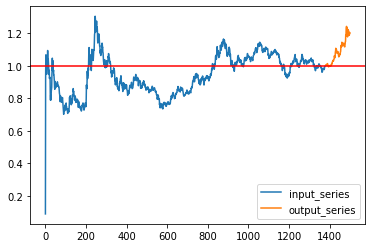

In [35]:
# sample_id 1012에 해당하는 sample의 분단위 시가 변동 정보 시각화
idx = 1886
plot_series(train_x_array[idx,:,1], train_y_array[idx,:,1])
plt.show()

오픈최고가 : 374 -> 개떡락 -> 오픈만 기준으로 하면 안 될듯

장중최고가 : 1886 -> 개떡상 -> 

최고거래량 : 3233 -> 한번 크게 튈 때 -> taker buy 급등

거래량2위 : 6668 변동 큼 -> ?

거래량3위 : 6968 계단식 하락 -> 개떡락할 때 

거래량4위 : 3959 변동 큼 -> 개떡상 직전에



/6968 개떡상


# 3. 모델 훈련하기
## 1) train 샘플 훈련하기

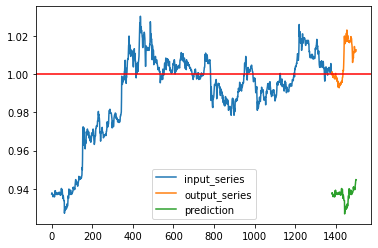

In [ ]:
idx = 1222

# train data 중 sample_id 1121에 해당하는 x_series로 arima 모델을 학습한 후
# y_sereis를 추론
x_series = train_x_array[idx,:,1]
y_series = train_y_array[idx,:,1]

# ARIMA의 (p,d,q) 값은 최적화 되지않은 값 입니다.
model = ARIMA(x_series, order=(3,1,2)) 
fit  = model.fit()
preds = fit.predict(1,120, typ='levels')

plot_series(x_series, y_series)
plt.plot(np.arange(1380, 1380+120), preds, label = 'prediction')
plt.legend()
plt.show()

## 2) validation set 훈련하기

### <1> validation 데이터 생성하기

In [ ]:
# train 데이터 상단의 300개 샘플로 validation set를 구성하여 학습 및 추론
valid_x_df = train_x_df[train_x_df.sample_id < 300]
valid_y_df = train_y_df[train_y_df.sample_id < 300]

valid_x_array = df2d_to_array3d(valid_x_df)
valid_y_array = df2d_to_array3d(valid_y_df)
valid_pred_array = np.zeros([300, 120])

### <2> 학습 및 추론하기

In [ ]:
# ARIMA의 (p,d,q) 값이 (5,1,1)에서 수렴하지 않을 경우
# (4,1,1)로 변경하여 다시 학습 및 추론
for idx in tqdm(range(valid_x_array.shape[0])):
    try:
        try:
            x_series = valid_x_array[idx,:,1]

            model = ARIMA(x_series, order=(5,1,1))
            fit  = model.fit()
            preds = fit.predict(1,120, typ='levels')
            valid_pred_array[idx,:] = preds# - (preds[0]-x_series[-1])
        except:
            print("order 4 1 1")
            x_series = valid_x_array[idx,:,1]

            model = ARIMA(x_series, order=(4,1,1))
            fit  = model.fit()
            preds = fit.predict(1,120, typ='levels')
            valid_pred_array[idx,:] = preds
    except:
        print(idx, " 샘플은 수렴하지 않습니다.")
        # ARIMA의 (p,d,q) 값이 (5,1,1), (4,1,1)에서 수렴하지 않을 경우
        # 모두 0으로 채움
        pass

 25%|██▌       | 75/300 [01:11<02:51,  1.31it/s]

order 4 1 1
74  샘플은 수렴하지 않습니다.


 43%|████▎     | 129/300 [02:07<02:39,  1.07it/s]

order 4 1 1


 98%|█████████▊| 294/300 [04:53<00:04,  1.30it/s]

order 4 1 1
293  샘플은 수렴하지 않습니다.


100%|██████████| 300/300 [05:03<00:00,  1.01s/it]


### <3> valid_pred_array 로부터 buy_quantity, sell_time 구하기

In [ ]:
def array_to_submission(x_array, pred_array):
    # 입력 x_arrry와 출력 pred_arry를 통해서 
    # buy_quantitiy와 sell_time을 결정
    submission = pd.DataFrame(np.zeros([pred_array.shape[0],2], np.int64),
                columns = ['buy_quantity', 'sell_time'])
    submission = submission.reset_index()
    submission.loc[:, 'buy_quantity'] = 0.1
    
    buy_price = []
    for idx, sell_time in enumerate(np.argmax(pred_array, axis = 1)):
        buy_price.append(pred_array[idx, sell_time])
    buy_price = np.array(buy_price)
    # 115% 이상 상승한하고 예측한 sample에 대해서만 100% 매수
    submission.loc[:, 'buy_quantity'] = (buy_price > 1.15) * 1
    # 모델이 예측값 중 최대 값에 해당하는 시간에 매도
    submission['sell_time'] = np.argmax(pred_array, axis = 1)
    submission.columns = ['sample_id','buy_quantity', 'sell_time']
    return submission

In [ ]:
valid_submission = array_to_submission(valid_x_array, valid_pred_array)
valid_submission
# 전체 300가지 sample에 대해
# 9가지 case에서 115% 이상 상승한다고 추론함.
valid_submission.buy_quantity.value_counts()

0    291
1      9
Name: buy_quantity, dtype: int64

### <4> 투자 후 금액 계산하기


In [ ]:
def df2d_to_answer(df_2d):
    # valid_y_df로부터
    # open 가격 정보가 포함된
    # [샘플 수, 120분] 크기의 
    # 2차원 array를 반환하는 함수
    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    sample_index = df_2d.sample_id.value_counts().index
    array_2d = df_2d.open.values.reshape([sample_size, time_size])
    sample_index = list(sample_index)
    return array_2d, sample_index


def COIN(y_df, submission, df2d_to_answer = df2d_to_answer):
    # 2차원 데이터프레임에서 open 시점 데이터만 추출하여 array로 복원
    # sample_id정보를 index에 저장
    y_array, index = df2d_to_answer(y_df)
    
    # index 기준으로 submission을 다시 선택
    submission = submission.set_index(submission.columns[0])
    submission = submission.iloc[index, :]    
    
    # 초기 투자 비용은 10000 달러
    total_momey      = 10000 # dolors
    total_momey_list = []
    
    # 가장 처음 sample_id값
    start_index = submission.index[0]
    for row_idx in submission.index:
        sell_time  = submission.loc[row_idx, 'sell_time']
        buy_price  = y_array[row_idx - start_index, 0]
        sell_price = y_array[row_idx - start_index, sell_time]
        buy_quantity = submission.loc[row_idx, 'buy_quantity'] * total_momey
        residual = total_momey - buy_quantity
        ratio = sell_price / buy_price
        total_momey = buy_quantity * ratio * 0.9995 * 0.9995 + residual        
        total_momey_list.append(total_momey)
        
    return total_momey, total_momey_list

10023.297695733363


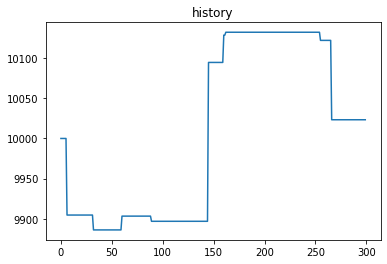

In [ ]:
total_momey, total_momey_list = COIN(valid_y_df, valid_submission)
# 투자 후 금액
print(total_momey)

# 투자 히스토리
plt.plot(total_momey_list)
plt.title("history")
plt.show()



# 4. test 데이터 학습하고 추론하기




In [ ]:
test_pred_array = np.zeros([test_x_array.shape[0],
                           120])
for idx in tqdm(range(test_x_array.shape[0])):
    try:
        try:
            x_series = test_x_array[idx,:,1]

            model = ARIMA(x_series, order=(5,1,1))
            fit  = model.fit()
            preds = fit.predict(1,120, typ='levels')
            test_pred_array[idx,:] = preds
        except:
            x_series = test_x_array[idx,:,1]
            model = ARIMA(x_series, order=(4,1,1))
            fit  = model.fit()
            preds = fit.predict(1,120, typ='levels')
            test_pred_array[idx,:] = preds
    except:
        print(idx, " 샘플은 수렴하지 않습니다.")
        pass

100%|██████████| 529/529 [09:27<00:00,  1.07s/it]


## 추론한 test_pred_array를 바탕으로 submission df 생성하기

In [ ]:
submission = array_to_submission(test_x_array, test_pred_array)
submission.to_csv("/content/drive/MyDrive/Colab/bit/baseline_submission.csv", index = False)